Step 1: Importing Required Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# For consistent results
np.random.seed(42)

Step 2: Creating a Sample Dataset

In [2]:
# Sample dataset creation
n_samples = 1000
data = {
    'CustomerID': np.arange(1, n_samples + 1),
    'Age': np.random.randint(18, 65, n_samples),
    'MonthlySpend': np.random.uniform(50, 500, n_samples).round(2),
    'Tenure': np.random.randint(1, 120, n_samples),  # in months
    'CustomerSupportCalls': np.random.randint(0, 10, n_samples),
    'HasInternetService': np.random.choice([0, 1], n_samples),
    'Churn': np.random.choice([0, 1], n_samples)  # 0: Stayed, 1: Left
}

# Creating DataFrame
df = pd.DataFrame(data)

# Showing first few rows of data
df.head()

# Save the dataset to a CSV file
df.to_csv('data/customer_data.csv', index=False)

Step 3: Data Preprocessing and Cleaning

3.1 Handling Missing Data

In [3]:
# Introduce some missing values into 'MonthlySpend'
df.loc[np.random.choice(df.index, size=50), 'MonthlySpend'] = np.nan

# Check for missing values
print(df.isnull().sum())

# Fill missing 'MonthlySpend' values with median
df['MonthlySpend'].fillna(df['MonthlySpend'].median(), inplace=True)

CustomerID               0
Age                      0
MonthlySpend            47
Tenure                   0
CustomerSupportCalls     0
HasInternetService       0
Churn                    0
dtype: int64


3.2 Handling Duplicates

In [4]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()


# Save the cleaned dataset to a CSV file
df.to_csv('data/cleaned_customer_data.csv', index=False)

0


Step 4: Feature Engineering and Data Transformation

4.1 Scaling Numeric Features

In [5]:
# Create 'TenureInYears' feature
df['TenureInYears'] = df['Tenure'] / 12

# Create 'AgeGroup' feature
bins = [18, 30, 40, 50, 65]
labels = ['18-30', '31-40', '41-50', '51-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the new features
df[['TenureInYears', 'AgeGroup']].head()

,TenureInYears,AgeGroup
0,0.500000,51-65
1,2.666667,41-50
2,7.750000,31-40
3,3.583333,51-65
4,0.166667,18-30


4.2 Creating New Features

In [6]:
# Create 'TenureInYears' feature
df['TenureInYears'] = df['Tenure'] / 12

# Create 'AgeGroup' feature
bins = [18, 30, 40, 50, 65]
labels = ['18-30', '31-40', '41-50', '51-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the new features
df[['TenureInYears', 'AgeGroup']].head()


,TenureInYears,AgeGroup
0,0.500000,51-65
1,2.666667,41-50
2,7.750000,31-40
3,3.583333,51-65
4,0.166667,18-30


Step 5: Data Quality Assessment

In [7]:
# Checking if data is balanced for Churn
print(df['Churn'].value_counts(normalize=True))

# Save the correlation heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('data/correlation_heatmap.png')
plt.show()


Churn
1    0.504
0    0.496
Name: proportion, dtype: float64


ValueError: could not convert string to float: '51-65'

<Figure size 1000x600 with 0 Axes>

Step 6: Exploratory Data Analysis (Optional Visualizations)

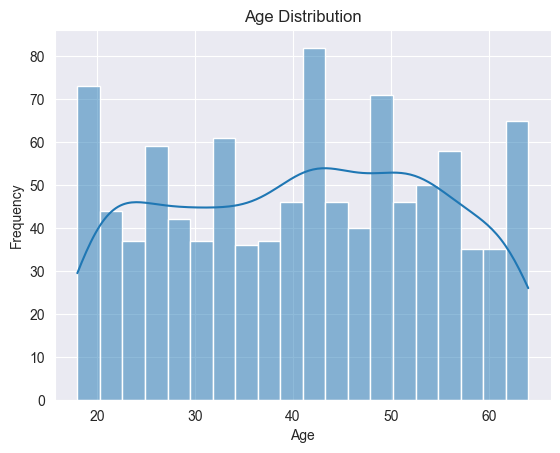

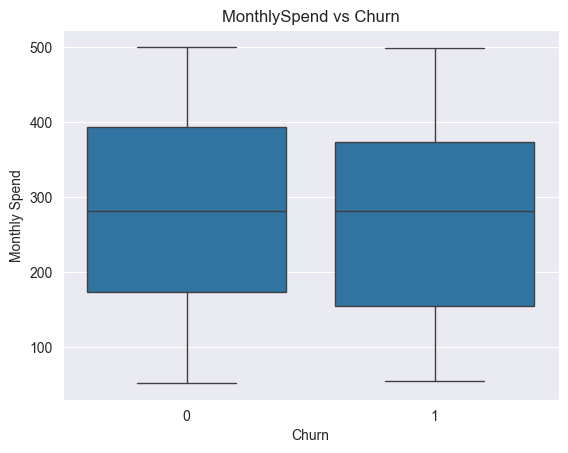

In [19]:
# Save the Age distribution plot
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('data/age_distribution.png')
plt.show()

# Save the MonthlySpend vs Churn plot
sns.boxplot(x='Churn', y='MonthlySpend', data=df)
plt.title('MonthlySpend vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Spend')
plt.savefig('data/monthly_spend_vs_churn.png')
plt.show()

Step 7: Model Building - Logistic Regression

7.1 Splitting the Data into Training and Test Sets

In [20]:
# Defining feature set and target variable
X = df.drop(columns=['CustomerID', 'Churn', 'AgeGroup'])  # Exclude categorical and ID columns
y = df['Churn']  # Target variable

# Splitting the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes of training and testing data
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (700, 6)
Test set shape: (300, 6)


7.2 Training and Evaluating Logistic Regression Model

In [21]:
# Creating a pipeline for scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predicting on test data
y_pred = best_model.predict(X_test)

# Model Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'logreg__C': 0.1, 'logreg__solver': 'liblinear'}
Accuracy: 0.5466666666666666
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       152
           1       0.53      0.63      0.58       148

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.54       300
weighted avg       0.55      0.55      0.54       300



Step 8: Model Results and Conclusion